Nama: Abdul Burhanudin

NPM: 2310631170001

Kelas: 5A Informatika

Dosen Pengampu: Ratna Mufidah, M.Kom

Aslab : Kang Farel

Mata Kuliah: Data Mining

# **1. Menggunakan dataset “Used Cars Price Prediction”**

Mengunduh dataset dari repositori GitHub agar bisa digunakan langsung di Google Colab.

In [2]:
# Load dataset Used Cars Price Prediction

!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

--2025-10-07 09:25:16--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.04s   

2025-10-07 09:25:16 (15.2 MB/s) - ‘used_cars_price_fiks.csv’ saved [602640/602640]



Import library pandas, membaca file CSV yang baru diunduh, dan menampilkan 5 baris pertama untuk memastikan data berhasil dimuat.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("used_cars_price_fiks.csv")

In [5]:
df.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# **2. Melakukan tahap preprocessing**

## **a. Profiling Data atau Preparation Data**

Menampilkan ukuran dataset (jumlah baris dan kolom) serta tipe data tiap kolom dan jumlah nilai non-null.

In [6]:
# Menampilkan jumlah baris dan kolom
print("Shape dataset:", df.shape)

# Menampilkan informasi umum dataset
df.info()

Shape dataset: (6019, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


Mengecek jumlah nilai kosong dan menghitung jumlah data duplikat di dataset.

In [7]:
# Cek jumlah nilai kosong di setiap kolom
print("Missing values per kolom:\n", df.isnull().sum())

# Cek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

Missing values per kolom:
 Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven    300
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

Jumlah data duplikat: 0


Menampilkan tipe data tiap kolom untuk memastikan mana yang numerik dan mana yang kategorikal.

In [8]:
# Lihat tipe data setiap kolom
print("Tipe data tiap kolom:\n", df.dtypes)

Tipe data tiap kolom:
 Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


Menampilkan statistik deskriptif seperti mean, min, max, dan std untuk kolom numerik.

In [9]:
# Statistik deskriptif (mean, min, max, std, dll)
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,5719.000000,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,3009.000000,2013.358199,57545.592586,18.134961,1621.276450,113.253050,5.278735,9.479468
std,1737.679967,3.269742,37988.496154,4.582289,601.355233,53.874957,0.808840,11.187917
min,0.000000,1998.000000,171.000000,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,33923.000000,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,3009.000000,2014.000000,53000.000000,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,4513.500000,2016.000000,72998.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,6018.000000,2019.000000,775000.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


Melihat semua nilai unik dalam kolom kategori agar tahu jenis bahan bakar, transmisi, lokasi, dll.

In [10]:
# Cek nilai unik dari kolom kategori
for col in ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']:
    print(f"\n{col}:", df[col].unique())


Fuel_Type: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

Transmission: ['Manual' 'Automatic']

Owner_Type: ['First' 'Second' 'Fourth & Above' 'Third']

Location: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


Menghapus kolom “Unnamed: 0” yang tidak dibutuhkan, lalu mengecek ulang daftar kolom dataset.

In [11]:
# Hapus kolom Unnamed
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Cek ulang kolom
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

## **b. Exploratory Data Analysis (EDA)**

Import library visualisasi matplotlib dan seaborn, serta mengatur gaya tampilan grafik.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style biar hasil visual lebih enak dilihat
sns.set(style="whitegrid")

Menampilkan histogram distribusi harga mobil (variabel Price).

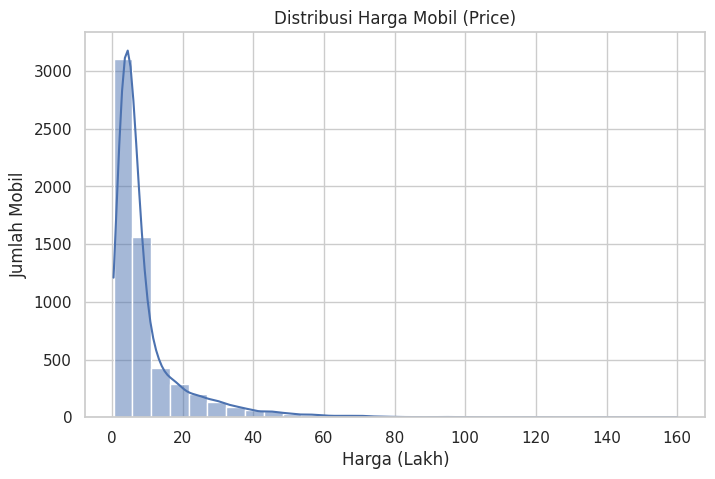

In [13]:
# Distribusi harga mobil bekas
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribusi Harga Mobil (Price)")
plt.xlabel("Harga (Lakh)")
plt.ylabel("Jumlah Mobil")
plt.show()

Membuat heatmap korelasi untuk melihat hubungan antar kolom numerik.

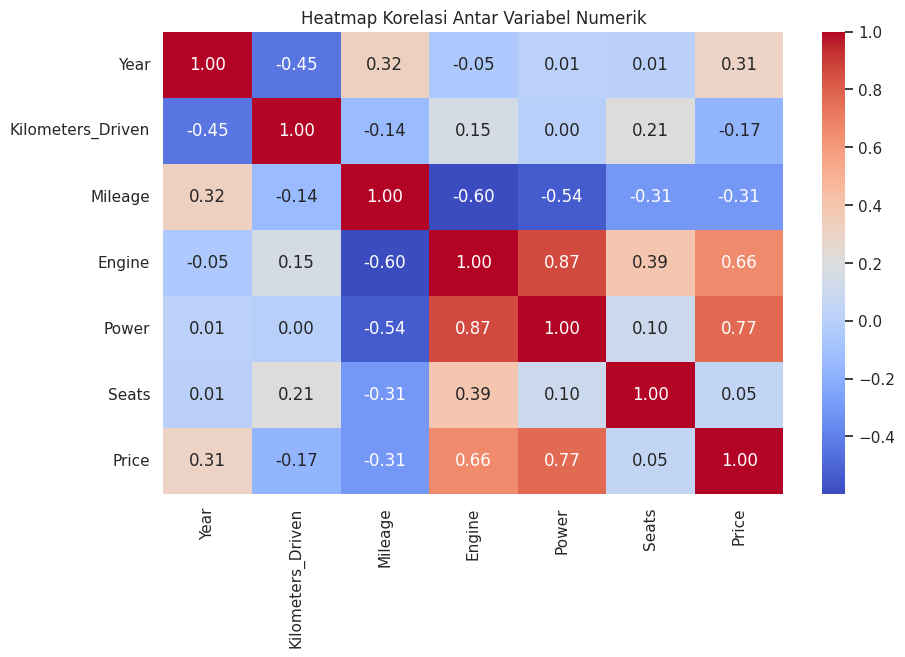

In [14]:
# Cek korelasi antar kolom numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

Membuat scatter plot untuk melihat apakah mobil yang lebih baru cenderung lebih mahal.

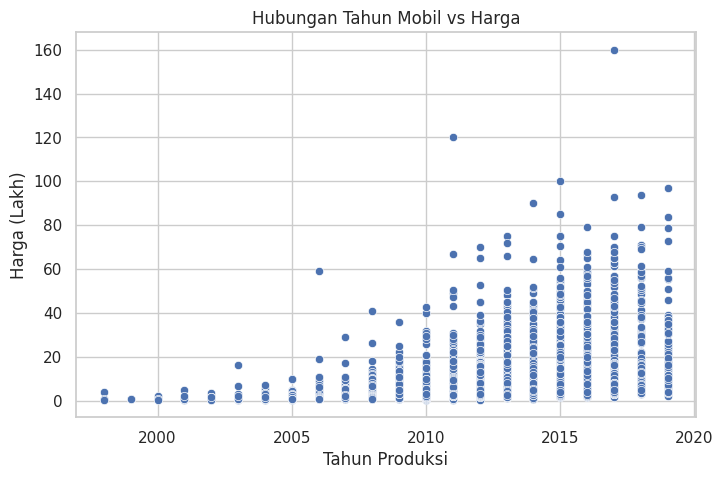

In [15]:
# Harga mobil berdasarkan tahun
plt.figure(figsize=(8,5))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title("Hubungan Tahun Mobil vs Harga")
plt.xlabel("Tahun Produksi")
plt.ylabel("Harga (Lakh)")
plt.show()

Membuat boxplot harga mobil berdasarkan jenis bahan bakar (Petrol, Diesel, dll).

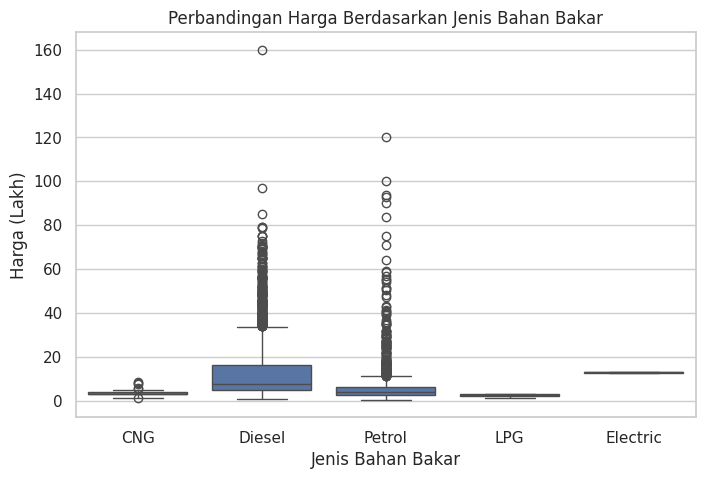

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Perbandingan Harga Berdasarkan Jenis Bahan Bakar")
plt.xlabel("Jenis Bahan Bakar")
plt.ylabel("Harga (Lakh)")
plt.show()

Membuat boxplot harga berdasarkan jenis transmisi (Manual vs Automatic).

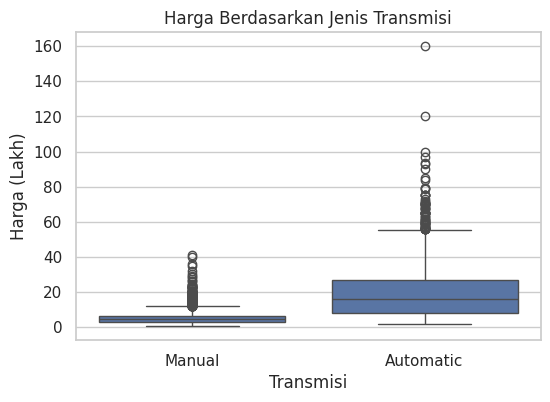

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title("Harga Berdasarkan Jenis Transmisi")
plt.xlabel("Transmisi")
plt.ylabel("Harga (Lakh)")
plt.show()

## **c. Data Cleaning**

Mengecek kembali jumlah missing value di tiap kolom sebelum pembersihan.

In [51]:
# Mengecek jumlah missing value di setiap kolom
df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0
Seats,0


Menunjukkan kondisi awal dataset — kolom mana aja yang masih punya nilai kosong dan ada/tidaknya duplikat.

In [47]:
print("Missing value sebelum cleaning:\n", df.isnull().sum())
print("\nJumlah data duplikat sebelum cleaning:", df.duplicated().sum())


Missing value sebelum cleaning:
 Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Jumlah data duplikat sebelum cleaning: 1


In [48]:
# Pisahkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Isi nilai kosong
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Cek hasil setelah diisi
print("Missing value setelah pengisian:\n", df.isnull().sum())

Missing value setelah pengisian:
 Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [49]:
df.drop_duplicates(inplace=True)
df['Year'] = df['Year'].astype(int)

print("Jumlah data duplikat setelah cleaning:", df.duplicated().sum())
print("Tipe data kolom Year:", df['Year'].dtypes)

Jumlah data duplikat setelah cleaning: 0
Tipe data kolom Year: int64


In [50]:
print("Cek missing value terakhir:\n", df.isnull().sum())
print("\nUkuran dataset setelah cleaning:", df.shape)

Cek missing value terakhir:
 Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Ukuran dataset setelah cleaning: (6018, 11)


Mengecek ulang apakah semua missing value sudah terisi (harus 0 semua).

In [46]:
# Cek ulang apakah semua sudah terisi
df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0
Seats,0


Menghapus data duplikat dan menampilkan ukuran dataset setelah penghapusan.

In [22]:
# Hapus baris duplikat
df.drop_duplicates(inplace=True)

# Cek ulang jumlah data setelah dihapus
df.shape

(6019, 12)

Mengecek dan memastikan tipe data Year sudah berbentuk integer.

In [23]:
# Cek tipe data
print(df.dtypes)

# Contoh: ubah kolom 'Year' jadi tipe integer (kalau belum)
df['Year'] = df['Year'].astype(int)

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


Menampilkan 5 baris pertama dari data yang sudah bersih dan memastikan jumlah baris/kolom akhir.

In [24]:
# Tampilkan 5 baris awal untuk memastikan data bersih
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [25]:
# Cek total data akhir
print("Jumlah data akhir:", df.shape)

Jumlah data akhir: (6019, 12)


## **d. Data Transformations**

Mengecek kolom mana saja yang masih bertipe object (kategori).

In [26]:
# Cek kolom mana aja yang masih bertipe object (kategori)
df.select_dtypes(include='object').columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

Menghapus kolom Name karena tidak relevan untuk prediksi.

In [27]:
# Kolom 'Name' tidak dibutuhkan untuk prediksi harga
df.drop(columns=['Name'], inplace=True)

# Cek ulang kolom
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

Mengubah kolom kategori menjadi numerik menggunakan One-Hot Encoding, dan menampilkan hasilnya.

In [28]:
# Lakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

# Tampilkan 5 baris awal hasil encoding
df_encoded.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000.0,26.60,998.0,58.16,5.0,1.75,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,2015,41000.0,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,True,True,False,False,False,True,False,False,False
2,2011,46000.0,18.20,1199.0,88.70,5.0,4.50,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,2012,87000.0,20.77,1248.0,88.76,7.0,6.00,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,2013,40670.0,15.20,1968.0,140.80,5.0,17.74,False,False,True,...,False,False,True,False,False,False,False,False,True,False


Menampilkan total kolom setelah encoding (harus numerik semua).

In [29]:
print("Jumlah kolom setelah encoding:", df_encoded.shape[1])
df_encoded.info()

Jumlah kolom setelah encoding: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   float64
 2   Mileage                    6019 non-null   float64
 3   Engine                     6019 non-null   float64
 4   Power                      6019 non-null   float64
 5   Seats                      6019 non-null   float64
 6   Price                      6019 non-null   float64
 7   Location_Bangalore         6019 non-null   bool   
 8   Location_Chennai           6019 non-null   bool   
 9   Location_Coimbatore        6019 non-null   bool   
 10  Location_Delhi             6019 non-null   bool   
 11  Location_Hyderabad         6019 non-null   bool   
 12  Location_Jaipur            6019 non-null   bool   
 13  Location_Kochi

## **e. Data Final**

Final check dataset: memastikan tidak ada missing value, semua kolom numerik, dan data siap dimodelkan.

In [30]:
print("Ukuran dataset akhir:", df_encoded.shape)
print("\nCek missing value (harus semua 0):\n", df_encoded.isnull().sum())
print("\nTipe data tiap kolom:\n", df_encoded.dtypes.head(10))

Ukuran dataset akhir: (6019, 25)

Cek missing value (harus semua 0):
 Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

Tipe data tiap kolom:
 Year                     int64
Kilometers_Driven      float64
Mileage                float64
Engine                 fl

In [31]:
df_encoded.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000.0,26.60,998.0,58.16,5.0,1.75,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,2015,41000.0,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,True,True,False,False,False,True,False,False,False
2,2011,46000.0,18.20,1199.0,88.70,5.0,4.50,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,2012,87000.0,20.77,1248.0,88.76,7.0,6.00,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,2013,40670.0,15.20,1968.0,140.80,5.0,17.74,False,False,True,...,False,False,True,False,False,False,False,False,True,False


# **3. Melakukan tahap modelling**

Import library dari scikit-learn untuk split data, scaling, dan membuat model Linear Regression.

In [32]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Memisahkan fitur (X) dan target (y) untuk persiapan training.

In [33]:
# X = fitur (semua kolom kecuali 'Price')
# y = target (kolom yang ingin diprediksi)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (6019, 24)
Shape y: (6019,)


Membagi dataset jadi 80% training dan 20% testing agar model bisa diuji dengan data baru.

In [34]:
# Bagi data: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data train:", X_train.shape)
print("Data test :", X_test.shape)

Data train: (4815, 24)
Data test : (1204, 24)


Melakukan scaling (standarisasi) supaya semua fitur punya skala nilai yang seimbang.

In [35]:
# Lakukan scaling hanya setelah split
scaler = StandardScaler()

# Fit scaler di data train lalu transform ke train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data train (scaled):", X_train_scaled.shape)

Data train (scaled): (4815, 24)


Membuat dan melatih model Linear Regression menggunakan data training yang sudah discaling.

In [36]:
# Inisialisasi model Linear Regression
model = LinearRegression()

# Latih model dengan data train
model.fit(X_train_scaled, y_train)

LinearRegression()

Menampilkan intercept (bias) dan jumlah koefisien yang dihasilkan oleh model.

In [37]:
print("Intercept:", model.intercept_)
print("Jumlah koefisien:", len(model.coef_))

Intercept: 9.508147455866986
Jumlah koefisien: 24


Membuat prediksi harga mobil menggunakan data testing dan menampilkan 5 hasil prediksi pertama.

In [38]:
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Lihat 5 hasil prediksi pertama
print("Prediksi harga mobil (dalam Lakh):")
print(y_pred[:5])

Prediksi harga mobil (dalam Lakh):
[ 4.8719347  13.4742561  11.91154292  5.45626014  4.48618878]


# **4. Melakukan tahap evaluasi model**

Menghitung dan menampilkan hasil evaluasi model menggunakan empat metrik:

R² (akurasi model)

MAE (rata-rata selisih)

MSE dan RMSE (tingkat error model)

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [40]:
# Hitung nilai evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Tampilkan hasil
print("📈 Hasil Evaluasi Model Linear Regression")
print("----------------------------------------")
print(f"R² Score  : {r2:.4f}")
print(f"MAE       : {mae:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"RMSE      : {rmse:.4f}")

📈 Hasil Evaluasi Model Linear Regression
----------------------------------------
R² Score  : 0.6930
MAE       : 3.7981
MSE       : 37.7749
RMSE      : 6.1461


- Membuat scatter plot untuk membandingkan hasil prediksi model (y_pred) dengan nilai aktual (y_test).

- Titik biru → hasil prediksi model terhadap data uji.

- Garis merah putus-putus (y = x) → garis ideal, di mana prediksi sama persis dengan nilai aktual.

- Semakin banyak titik biru yang mendekati garis merah, berarti model makin akurat dalam memprediksi harga mobil.

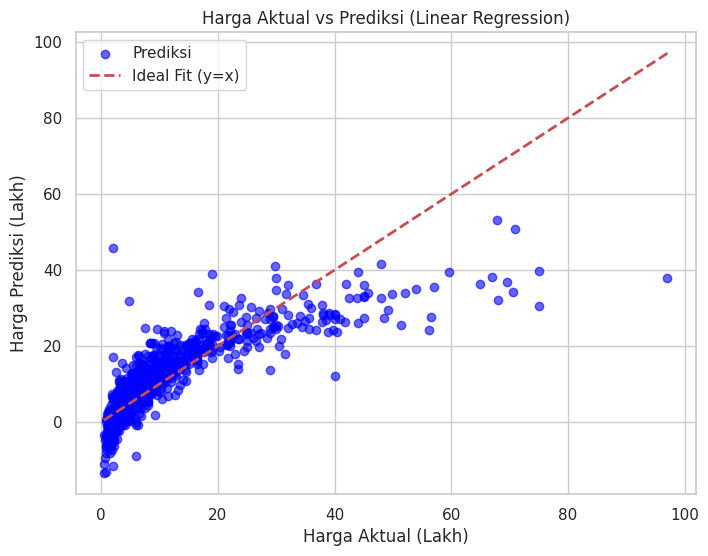

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit (y=x)')
plt.xlabel("Harga Aktual (Lakh)")
plt.ylabel("Harga Prediksi (Lakh)")
plt.title("Harga Aktual vs Prediksi (Linear Regression)")
plt.legend()
plt.show()

Baris ini menampilkan hasil evaluasi model secara numerik sehingga membantu mengetahui apakah model sudah cukup akurat untuk memprediksi harga mobil bekas.

In [42]:
#Evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score  :", r2)
print("MAE       :", mae)
print("MSE       :", mse)
print("RMSE      :", rmse)

R² Score  : 0.6930355425383958
MAE       : 3.798146536749495
MSE       : 37.77489016450676
RMSE      : 6.146128062813755
